In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

import nbodykit.lab
from nbodykit.lab import *
from nbodykit import style, setup_logging

from nbodykit.source.catalog import ArrayCatalog

setup_logging()

# Create a custom catalog with positions (x, y, z)
x = np.array([1.0, 2.0, 3.0, 4.0])
y = np.array([2.0, 3.0, 4.0, 5.0])
z = np.array([3.0, 4.0, 5.0, 6.0])

# Stack the positions horizontally
positions = np.column_stack((x, y, z))

# Define the data type for the structured array
dtype = [('Position', ('f8', 3))]

# Create the structured numpy array
data = np.array(list(zip(positions)), dtype=dtype)

# Create the ArrayCatalog
custom_catalog = ArrayCatalog(data)

# Define box size and number of bins
box_size = [5.0, 5.0, 5.0]
num_bins = 64

# Calculate the power spectrum
power = FFTPower(custom_catalog, mode='1d', BoxSize=box_size, Nmesh=num_bins)
result = power.run()

# Access the power spectrum values

print(result)

[ 000000.02 ]   0: 09-28 17:41  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 4 
[ 000000.10 ]   0: 09-28 17:41  CatalogMesh     INFO     painted 4 out of 4 objects to mesh
[ 000000.10 ]   0: 09-28 17:41  CatalogMesh     INFO     painted 4 out of 4 objects to mesh
[ 000000.10 ]   0: 09-28 17:41  CatalogMesh     INFO     mean particles per cell is 1.52588e-05
[ 000000.10 ]   0: 09-28 17:41  CatalogMesh     INFO     sum is 4 
[ 000000.10 ]   0: 09-28 17:41  CatalogMesh     INFO     normalized the convention to 1 + delta
[ 000000.11 ]   0: 09-28 17:41  CatalogMesh     INFO     field: (ArrayCatalog(size=4) as CatalogMesh) painting done
[ 000000.15 ]   0: 09-28 17:41  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 4 
[ 000000.23 ]   0: 09-28 17:41  CatalogMesh     INFO     painted 4 out of 4 objects to mesh
[ 000000.23 ]   0: 09-28 17:41  CatalogMesh     INFO     painted 4 out of 4 objects to mesh
[ 000000.23 ]   0: 09-28 17:41  CatalogMesh     INFO     mean particles per cell is 1.52588e-05
[

(<BinnedStatistic: dims: (k: 32), variables: ('k', 'power', 'modes')>, None)


In [2]:
# Because I always forget how to do this.
#
# Credit: https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/

import numpy as np
import matplotlib.pyplot as plt
from   matplotlib import cm
from   mpl_toolkits.mplot3d import Axes3D
from   scipy.stats import multivariate_normal

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# The distribution on the variables X, Y packed into pos.
F = multivariate_normal(mu, Sigma)
Z = F.pdf(pos)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

TypeError: gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

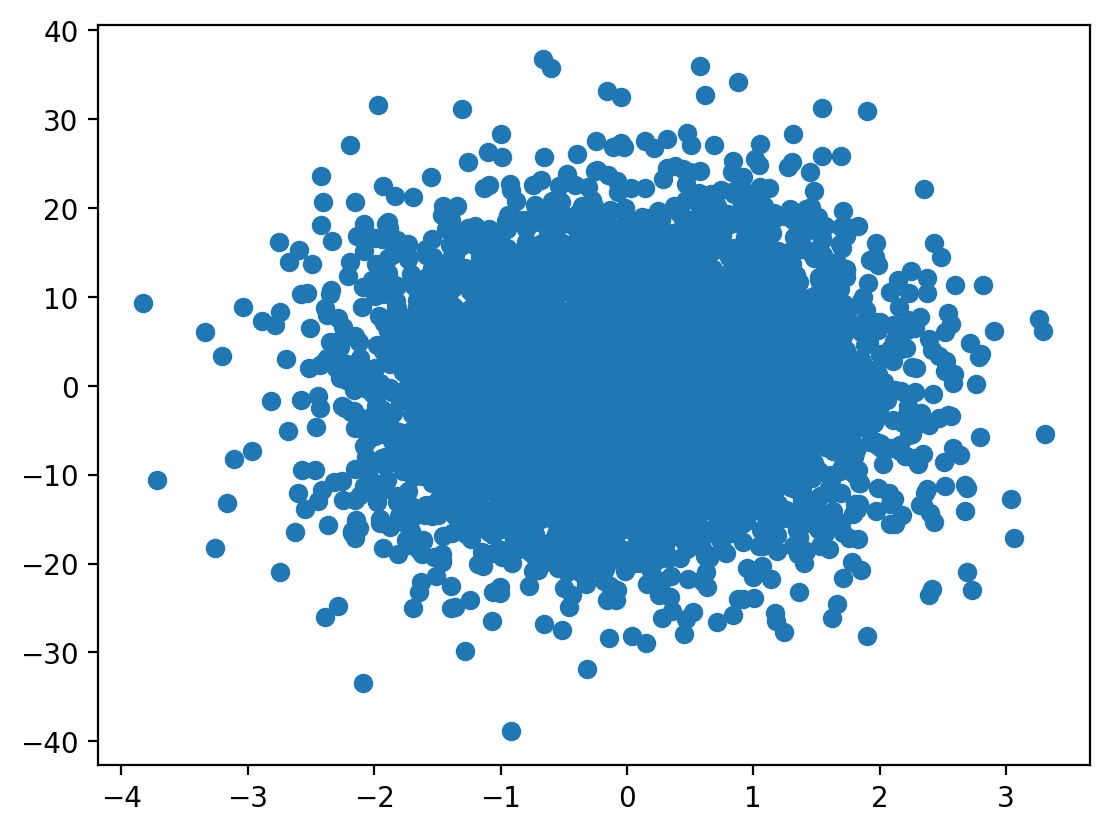

In [3]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]
samples = np.random.multivariate_normal(mean, cov, 5000)
plt.scatter(samples[:, 0], samples[:, 1])
plt.show()